# Handeling imbalance Data
1. Up Sampling
2. Down Sampling 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
np.random.seed(123)

total = 1000
sep = 0.9
data1 = int(total*sep)
data2 = int(total - data1)

In [59]:
df1 = pd.DataFrame({
    'feature 1': np.random.normal(loc = 0, size = data1),
    'feature 2': np.random.normal(loc = 0, size = data1),
    'target' : [0]*data1
})
df2 = pd.DataFrame({
    'feature 1' : np.random.normal(loc=2 , size =data2),
    'feature 2' : np.random.normal(loc=2 , size =data2),
    'target' : [1]*data2
})

In [60]:
df = pd.concat([df1,df2])
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [61]:
df.head()

,feature 1,feature 2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0


<Axes: xlabel='feature 1', ylabel='feature 2'>

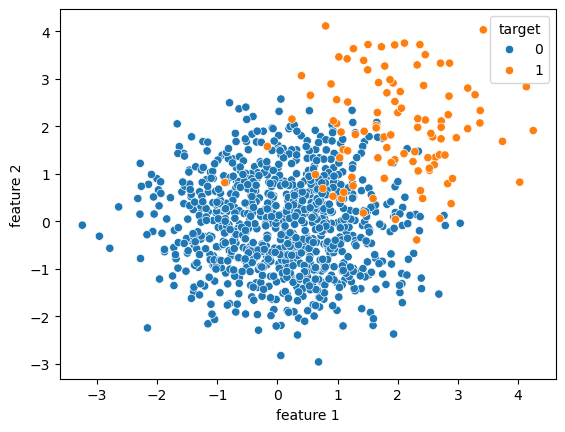

In [67]:
sns.scatterplot(data = df, x = df['feature 1'], y= df['feature 2'], hue= df.target)

In [68]:
df_minority = df[df.target == 1]
df_majority = df[df.target==0]

## Up sampling

In [69]:
from sklearn.utils import resample
df_upsampled = resample(df_minority, replace = True,
                        n_samples = len(df_majority),
                        random_state = 42
) 

In [70]:
df_upsampled.shape

(900, 3)

In [71]:
df_upsampled.head()

,feature 1,feature 2,target
51,2.701255,0.056481,1
92,2.322342,3.289170,1
14,2.500618,1.338170,1
71,1.922944,2.907951,1
60,0.630218,0.982405,1


In [76]:
final_df = pd.concat([df1,df_upsampled])

In [77]:
final_df

,feature 1,feature 2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0
...,...,...,...
52,1.035138,1.334364,1
65,2.722939,2.109470,1
76,0.929157,2.111367,1
42,2.367930,3.715577,1


<Axes: xlabel='feature 1', ylabel='feature 2'>

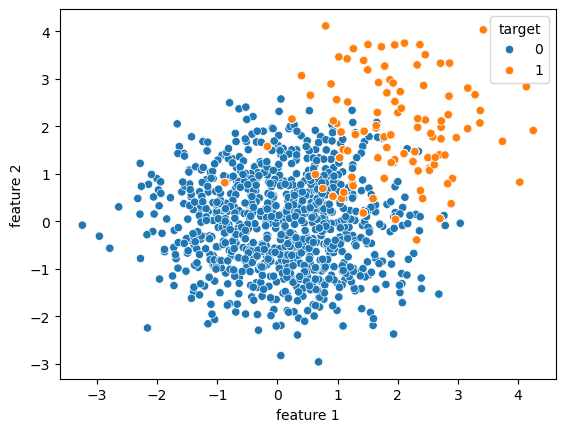

In [78]:
sns.scatterplot(data = final_df, x = final_df['feature 1'], y = final_df['feature 2'] , hue = final_df['target'])

## none of the graph point change its position that's why we used over-samapling

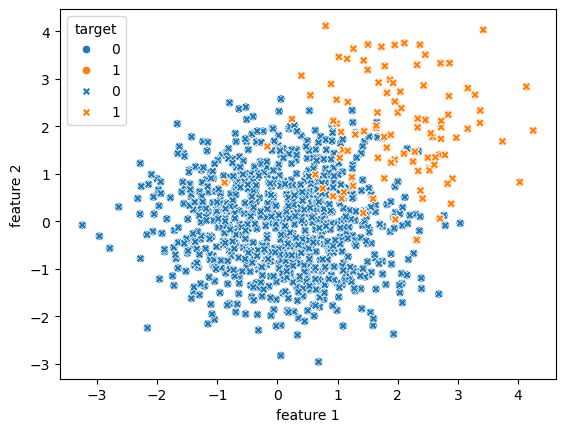

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# First scatter plot
sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='target')

# Second scatter plot (another set of features or points)
sns.scatterplot(data=final_df, x='feature 1', y='feature 2', hue='target', marker='X')

plt.show()


## Downsampling

In [49]:
df_downsampled = resample(df_majority, replace = False,
                          n_samples = len(df_minority),
                          random_state=22                          
                          )

In [51]:
pd.concat([df2,df_downsampled]).target.value_counts()

target
1    100
0    100
Name: count, dtype: int64